A practical introduction to Pandas
===================

We have been asked to *analyze an otp dataset*, without much more information. This kind of scenario is more common than you might imagine!

## 1) Quickly examine the attached file. What does it contain, in both technical and functional terms? (Use any tool you want)

In this example, I am using the shell from within this notebook, with the ! notation:

A ! sign before a line tells the notebook to send that line straight away to the underlying OS. 

\* Note that the specific commands available under the ! sign are dependent on the OS.

### Check what the file contains

Oh, it has a readme! Always good to read it.

### Unzip the readme to the current directory

Use the shell of your OS or the GUI.

Remember, since zip files contain several compressed files, we need to specify which one we want.

### Take a look at the beginning of the readme file

using the shell

In [1]:
!head readme.html

<HTML>
<HEAD>
	<TITLE> readme.html </TITLE>
</HEAD>
<BODY>
	<TABLE><TR><TD COLSPAN=2><H4>BACKGROUND</H4></TD></TR>
	<TR><TD COLSPAN=2>The data contained in the compressed file has been extracted from the 
	Reporting Carrier On-Time Performance (1987-present) data table of the "On-Time" database from the TranStats data library. 
	The time period is indicated in the name of the compressed file; 
	for example, XXX_XXXXX_2001_1 contains data of the first month of the year 2001. </TD></TR>


The readme file is html. Luckily, we are working in an html environment. 

### Display the contents of `readme.html` within the notebook
(Hint: check out [IPython.display.IFrame](https://ipython.org/ipython-doc/3/api/generated/IPython.display.html))

In [2]:
#usamos IFrame para visualizar htmls
from IPython.display import IFrame

IFrame('https://elpais.com', 800, 300)

In [3]:
IFrame('readme.html', 800, 300)

That's some very good documentation!

### Summary: 

The files within the zip are " quoted csv's. They contain information on timeliness of departures in the US, at the departure level.

### Load some of the data (one of the files) into memory as a pandas dataframe. What functions do you need to use?

Pro tip: there is no need to decompress the whole file. Check out [zipfile.ZipFile](https://docs.python.org/3/library/zipfile.html)

First, open a connection to one of the files

zip_file is a connection to the compressed file, the .zip. We can use it to open a connection to one of the files it contains, which will behave like a normal uncompressed file that we had opened with open()

Now we're ready to load the file into memory as a pandas dataframe. Remember to close the connections to the files!

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2019_10.csv')

/home/angelrps/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (48,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Let's start examining the data: show the beginning of the file. How many records does it contain?

In [6]:
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2019,4,10,1,2,2019-10-01,EV,20366,EV,N14905,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,4,10,2,3,2019-10-02,EV,20366,EV,N13118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,4,10,3,4,2019-10-03,EV,20366,EV,N17185,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,4,10,4,5,2019-10-04,EV,20366,EV,N11107,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,4,10,5,6,2019-10-05,EV,20366,EV,N609UX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.shape

(636014, 110)

In [11]:
pd.options.display.max_columns = None
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2019,4,10,1,2,2019-10-01,EV,20366,EV,N14905,3965,10469,1046902,30469,AZO,"Kalamazoo, MI",MI,26,Michigan,43,13930,1393007,30977,ORD,"Chicago, IL",IL,17,Illinois,41,630,622.0,-8.0,0.0,0.0,-1.0,0600-0659,10.0,632.0,602.0,10.0,638,612.0,-26.0,0.0,0.0,-2.0,0600-0659,0.0,NaN,0.0,68.0,50.0,30.0,1.0,122.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,4,10,2,3,2019-10-02,EV,20366,EV,N13118,3965,10469,1046902,30469,AZO,"Kalamazoo, MI",MI,26,Michigan,43,13930,1393007,30977,ORD,"Chicago, IL",IL,17,Illinois,41,630,626.0,-4.0,0.0,0.0,-1.0,0600-0659,17.0,643.0,621.0,19.0,638,640.0,2.0,2.0,0.0,0.0,0600-0659,0.0,NaN,0.0,68.0,74.0,38.0,1.0,122.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,4,10,3,4,2019-10-03,EV,20366,EV,N17185,3965,10469,1046902,30469,AZO,"Kalamazoo, MI",MI,26,Michigan,43,13930,1393007,30977,ORD,"Chicago, IL",IL,17,Illinois,41,630,620.0,-10.0,0.0,0.0,-1.0,0600-0659,21.0,641.0,612.0,11.0,638,623.0,-15.0,0.0,0.0,-1.0,0600-0659,0.0,NaN,0.0,68.0,63.0,31.0,1.0,122.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,4,10,4,5,2019-10-04,EV,20366,EV,N11107,3965,10469,1046902,30469,AZO,"Kalamazoo, MI",MI,26,Michigan,43,13930,1393007,30977,ORD,"Chicago, IL",IL,17,Illinois,41,630,622.0,-8.0,0.0,0.0,-1.0,0600-0659,13.0,635.0,607.0,11.0,638,618.0,-20.0,0.0,0.0,-2.0,0600-0659,0.0,NaN,0.0,68.0,56.0,32.0,1.0,122.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,4,10,5,6,2019-10-05,EV,20366,EV,N609UX,3965,11042,1104205,30647,CLE,"Cleveland, OH",OH,39,Ohio,44,12266,1226603,31453,IAH,"Houston, TX",TX,48,Texas,74,645,642.0,-3.0,0.0,0.0,-1.0,0600-0659,22.0,704.0,829.0,7.0,855,836.0,-19.0,0.0,0.0,-2.0,0800-0859,0.0,NaN,0.0,190.0,174.0,145.0,1.0,1091.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

## Trimming the data

The table is quite wide, and it seems that there are many columns without much data. Which, exactly, are those? (let's consider empty a column that doesn't contain at least 1000 records, arbitrarily)

In [12]:
df.count()
#nos da las columnas que sólo tienen Nan, es decir vacías.

Year                636014
Quarter             636014
Month               636014
DayofMonth          636014
DayOfWeek           636014
                     ...  
Div5TotalGTime           0
Div5LongestGTime         0
Div5WheelsOff            0
Div5TailNum              0
Unnamed: 109             0
Length: 110, dtype: int64

In [15]:
df.count() < 1000

Year                False
Quarter             False
Month               False
DayofMonth          False
DayOfWeek           False
                    ...  
Div5TotalGTime       True
Div5LongestGTime     True
Div5WheelsOff        True
Div5TailNum          True
Unnamed: 109         True
Length: 110, dtype: bool

In [17]:
empty_cols = df.columns[df.count() < 1000]
empty_cols

Index(['Div2Airport', 'Div2AirportID', 'Div2AirportSeqID', 'Div2WheelsOn',
       'Div2TotalGTime', 'Div2LongestGTime', 'Div2WheelsOff', 'Div2TailNum',
       'Div3Airport', 'Div3AirportID', 'Div3AirportSeqID', 'Div3WheelsOn',
       'Div3TotalGTime', 'Div3LongestGTime', 'Div3WheelsOff', 'Div3TailNum',
       'Div4Airport', 'Div4AirportID', 'Div4AirportSeqID', 'Div4WheelsOn',
       'Div4TotalGTime', 'Div4LongestGTime', 'Div4WheelsOff', 'Div4TailNum',
       'Div5Airport', 'Div5AirportID', 'Div5AirportSeqID', 'Div5WheelsOn',
       'Div5TotalGTime', 'Div5LongestGTime', 'Div5WheelsOff', 'Div5TailNum',
       'Unnamed: 109'],
      dtype='object')

It seems that the "diverted" fields, after the first, are often empty. No big surprise, since not that many flights must be diverted more than once in a month. Let's drop those columns, since we are not that interested in those, at least for now.

In [18]:
#elimino las columnas que están casi vacías
df.drop(empty_cols, axis=1)
#con axis=0 intentaría hacer drop de filas en vez de columnas

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum
0,2019,4,10,1,2,2019-10-01,EV,20366,EV,N14905,3965,10469,1046902,30469,AZO,"Kalamazoo, MI",MI,26,Michigan,43,13930,1393007,30977,ORD,"Chicago, IL",IL,17,Illinois,41,630,622.0,-8.0,0.0,0.0,-1.0,0600-0659,10.0,632.0,602.0,10.0,638,612.0,-26.0,0.0,0.0,-2.0,0600-0659,0.0,NaN,0.0,68.0,50.0,30.0,1.0,122.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,4,10,2,3,2019-10-02,EV,20366,EV,N13118,3965,10469,1046902,30469,AZO,"Kalamazoo, MI",MI,26,Michigan,43,13930,1393007,30977,ORD,"Chicago, IL",IL,17,Illinois,41,630,626.0,-4.0,0.0,0.0,-1.0,0600-0659,17.0,643.0,621.0,19.0,638,640.0,2.0,2.0,0.0,0.0,0600-0659,0.0,NaN,0.0,68.0,74.0,38.0,1.0,122.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,4,10,3,4,2019-10-03,EV,20366,EV,N17185,3965,10469,1046902,30469,AZO,"Kalamazoo, MI",MI,26,Michigan,43,13930,1393007,30977,ORD,"Chicago, IL",IL,17,Illinois,41,630,620.0,-10.0,0.0,0.0,-1.0,0600-0659,21.0,641.0,612.0,11.0,638,623.0,-15.0,0.0,0.0,-1.0,0600-0659,0.0,NaN,0.0,68.0,63.0,31.0,1.0,122.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,4,10,4,5,2019-10-04,EV,20366,EV,N11107,3965,10469,1046902,30469,AZO,"Kalamazoo, MI",MI,26,Michigan,43,13930,1393007,30977,ORD,"Chicago, IL",IL,17,Illinois,41,630,622.0,-8.0,0.0,0.0,-1.0,0600-0659,13.0,635.0,607.0,11.0,638,618.0,-20.0,0.0,0.0,-2.0,0600-0659,0.0,NaN,0.0,68.0,56.0,32.0,1.0,122.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,4,10,5,6,2019-10-05,EV,20366,EV,N609UX,3965,11042,1104205,30647,CLE,"Cleveland, OH",OH,39,Ohio,44,12266,1226603,31453,IAH,"Houston, TX",TX,48,Texas,74,645,642.0,-3.0,0.0,0.0,-1.0,0600-0659,22.0,704.0,829.0,7.0,855,836.0,-19.0,0.0,0.0,-2.0,0800-0859,0.0,NaN,0.0,190.0,174.0,145.0,1.0,1091.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636009,2019,4,10,31,4,2019-10-31,AA,19805,AA,N774XF,2301,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,13851,1385103,33851,OKC,"Oklahoma City, OK",OK,40,Oklahoma,73,850,916.0,26.0,26.0,1.0,1.0,0800-0859,27.0,943.0,1019.0,3.0,950,1022.0,32.0,32.0,1.0,2.0,0900-0959,0.0,NaN,0.0,60.0,66.0,36.0,1.0,175.0,1,2.0,0.0,6.0,0.0,24.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
636010,2019,4,10,1,2,2019-10-01,AA,19805,AA,N767UW,2301,13851,1385103,33851,OKC,"Oklahoma City, OK",OK,40,Oklahoma,73,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,1028,1019.0,-9.0,0.0,0.0,-1.0,1000-1059,12.0,1031.0,1104.0,14.0,1140,1118.0,-22.0,0.0,0.0,-2.0,1100-1159,0.0,NaN,0.0,72.0,59.0,33.0,1.0,175.0,1,NaN,NaN,NaN,NaN,NaN

In [19]:
#otra manera
df.dropna(axis=1, thresh=1000)
#subset es el conjunto de las columnas a considerar
#thresh es el mínimo número de no nan exigido

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum
0,2019,4,10,1,2,2019-10-01,EV,20366,EV,N14905,3965,10469,1046902,30469,AZO,"Kalamazoo, MI",MI,26,Michigan,43,13930,1393007,30977,ORD,"Chicago, IL",IL,17,Illinois,41,630,622.0,-8.0,0.0,0.0,-1.0,0600-0659,10.0,632.0,602.0,10.0,638,612.0,-26.0,0.0,0.0,-2.0,0600-0659,0.0,NaN,0.0,68.0,50.0,30.0,1.0,122.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,4,10,2,3,2019-10-02,EV,20366,EV,N13118,3965,10469,1046902,30469,AZO,"Kalamazoo, MI",MI,26,Michigan,43,13930,1393007,30977,ORD,"Chicago, IL",IL,17,Illinois,41,630,626.0,-4.0,0.0,0.0,-1.0,0600-0659,17.0,643.0,621.0,19.0,638,640.0,2.0,2.0,0.0,0.0,0600-0659,0.0,NaN,0.0,68.0,74.0,38.0,1.0,122.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,4,10,3,4,2019-10-03,EV,20366,EV,N17185,3965,10469,1046902,30469,AZO,"Kalamazoo, MI",MI,26,Michigan,43,13930,1393007,30977,ORD,"Chicago, IL",IL,17,Illinois,41,630,620.0,-10.0,0.0,0.0,-1.0,0600-0659,21.0,641.0,612.0,11.0,638,623.0,-15.0,0.0,0.0,-1.0,0600-0659,0.0,NaN,0.0,68.0,63.0,31.0,1.0,122.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,4,10,4,5,2019-10-04,EV,20366,EV,N11107,3965,10469,1046902,30469,AZO,"Kalamazoo, MI",MI,26,Michigan,43,13930,1393007,30977,ORD,"Chicago, IL",IL,17,Illinois,41,630,622.0,-8.0,0.0,0.0,-1.0,0600-0659,13.0,635.0,607.0,11.0,638,618.0,-20.0,0.0,0.0,-2.0,0600-0659,0.0,NaN,0.0,68.0,56.0,32.0,1.0,122.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,4,10,5,6,2019-10-05,EV,20366,EV,N609UX,3965,11042,1104205,30647,CLE,"Cleveland, OH",OH,39,Ohio,44,12266,1226603,31453,IAH,"Houston, TX",TX,48,Texas,74,645,642.0,-3.0,0.0,0.0,-1.0,0600-0659,22.0,704.0,829.0,7.0,855,836.0,-19.0,0.0,0.0,-2.0,0800-0859,0.0,NaN,0.0,190.0,174.0,145.0,1.0,1091.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636009,2019,4,10,31,4,2019-10-31,AA,19805,AA,N774XF,2301,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,13851,1385103,33851,OKC,"Oklahoma City, OK",OK,40,Oklahoma,73,850,916.0,26.0,26.0,1.0,1.0,0800-0859,27.0,943.0,1019.0,3.0,950,1022.0,32.0,32.0,1.0,2.0,0900-0959,0.0,NaN,0.0,60.0,66.0,36.0,1.0,175.0,1,2.0,0.0,6.0,0.0,24.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
636010,2019,4,10,1,2,2019-10-01,AA,19805,AA,N767UW,2301,13851,1385103,33851,OKC,"Oklahoma City, OK",OK,40,Oklahoma,73,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,1028,1019.0,-9.0,0.0,0.0,-1.0,1000-1059,12.0,1031.0,1104.0,14.0,1140,1118.0,-22.0,0.0,0.0,-2.0,1100-1159,0.0,NaN,0.0,72.0,59.0,33.0,1.0,175.0,1,NaN,NaN,NaN,NaN,NaN

In [20]:
df2 = df.dropna(axis=1, thresh=1000)

Now that we have eliminated some inconvenient data columns, let's have a look at the rest: let's loook at how the location data is encoded.


#### Exercise:

First, generate a list of the columns that have 'Origin' in their name

Second, show a sample of the values that those columns take.

Hint: we are going to use the str attribute of Series and Indexes


In [25]:
df2.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'DOT_ID_Reporting_Airline',
       'IATA_CODE_Reporting_Airline', 'Tail_Number',
       'Flight_Number_Reporting_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'Origin', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'Dest',
       'DestCityName', 'DestState', 'DestStateFips', 'DestStateName',
       'DestWac', 'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes',
       'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut',
       'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay',
       'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk',
       'Cancelled', 'CancellationCode', 'Diverted', 'CRSElapsedTime',
       'ActualElapsedTime', 'AirTime', 'Flights', 'Distance', 'DistanceGroup',
       'CarrierD

In [27]:
df2.columns.str.contains('Origin')

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [28]:
origin_col_names = df2.columns[df2.columns.str.contains('Origin')]
origin_col_names

Index(['OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'Origin',
       'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName',
       'OriginWac'],
      dtype='object')

In [29]:
df2[origin_col_names].sample(5)

,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac
436823,13487,1348702,31650,MSP,"Minneapolis, MN",MN,27,Minnesota,63
343597,11697,1169706,32467,FLL,"Fort Lauderdale, FL",FL,12,Florida,33
32311,13930,1393007,30977,ORD,"Chicago, IL",IL,17,Illinois,41
132671,14893,1489302,33192,SMF,"Sacramento, CA",CA,6,California,91
433152,12892,1289208,32575,LAX,"Los Angeles, CA",CA,6,California,91


So much redundant information!

## Fast forward

Just taking out the redundant columns would take a while, so let's jump ahead with this list of interesting columns:

```python
interesting_columns= ['FlightDate', 'DayOfWeek', 'Reporting_Airline', 'Tail_Number', 'Flight_Number_Reporting_Airline', 
                      'Origin', 'OriginCityName', 'OriginStateName', 'OriginCityMarketID',
                      'Dest', 'DestCityName', 'DestStateName', 'DestCityMarketID',
                      'DepTime', 'DepDelay', 'AirTime', 'Distance']
```

In [30]:
interesting_columns= ['FlightDate', 'DayOfWeek', 'Reporting_Airline', 'Tail_Number', 'Flight_Number_Reporting_Airline', 
                      'Origin', 'OriginCityName', 'OriginStateName', 'OriginCityMarketID',
                      'Dest', 'DestCityName', 'DestStateName', 'DestCityMarketID',
                      'DepTime', 'DepDelay', 'AirTime', 'Distance']
df3 = df2[interesting_columns]
df3.head()

,FlightDate,DayOfWeek,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,Origin,OriginCityName,OriginStateName,OriginCityMarketID,Dest,DestCityName,DestStateName,DestCityMarketID,DepTime,DepDelay,AirTime,Distance
0,2019-10-01,2,EV,N14905,3965,AZO,"Kalamazoo, MI",Michigan,30469,ORD,"Chicago, IL",Illinois,30977,622.0,-8.0,30.0,122.0
1,2019-10-02,3,EV,N13118,3965,AZO,"Kalamazoo, MI",Michigan,30469,ORD,"Chicago, IL",Illinois,30977,626.0,-4.0,38.0,122.0
2,2019-10-03,4,EV,N17185,3965,AZO,"Kalamazoo, MI",Michigan,30469,ORD,"Chicago, IL",Illinois,30977,620.0,-10.0,31.0,122.0
3,2019-10-04,5,EV,N11107,3965,AZO,"Kalamazoo, MI",Michigan,30469,ORD,"Chicago, IL",Illinois,30977,622.0,-8.0,32.0,122.0
4,2019-10-05,6,EV,N609UX,3965,CLE,"Cleveland, OH",Ohio,30647,IAH,"Houston, TX",Texas,31453,642.0,-3.0,145.0,1091.0


## Formatting columns and parsing dates and times

Hurray! we have almost cleaned our dataset. Soon we will begin to do some actual work with it. 

In [32]:
df3.dtypes

FlightDate                          object
DayOfWeek                            int64
Reporting_Airline                   object
Tail_Number                         object
Flight_Number_Reporting_Airline      int64
Origin                              object
OriginCityName                      object
OriginStateName                     object
OriginCityMarketID                   int64
Dest                                object
DestCityName                        object
DestStateName                       object
DestCityMarketID                     int64
DepTime                            float64
DepDelay                           float64
AirTime                            float64
Distance                           float64
dtype: object

Pandas interpreted the Deptime column as ints and the FlightDate column as strings. We might want to combine them and parse them into a DateTime column, so that we can use them properly as datetimes. For that, we would need to use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html).

Also, a pet peeve of mine: Flight numbers are names, not numbers!

In [36]:
#un número de vuelo no tiene sentido que sea integer. lo cambiamos a object
#no tiene sentido hacer cálculos con el número de vuelo.
df3['Flight_Number_Reporting_Airline'] = df3['Flight_Number_Reporting_Airline'].astype(object)
df3.dtypes

/home/angelrps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


FlightDate                          object
DayOfWeek                            int64
Reporting_Airline                   object
Tail_Number                         object
Flight_Number_Reporting_Airline     object
Origin                              object
OriginCityName                      object
OriginStateName                     object
OriginCityMarketID                   int64
Dest                                object
DestCityName                        object
DestStateName                       object
DestCityMarketID                     int64
DepTime                            float64
DepDelay                           float64
AirTime                            float64
Distance                           float64
dtype: object

In [38]:
#queremos crear una columna sólo con la hora. Dividimos por 100
df3['Hour'] = df3['DepTime'] // 100
df3['Hour']

/home/angelrps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0          6.0
1          6.0
2          6.0
3          6.0
4          6.0
          ... 
636009     9.0
636010    10.0
636011    10.0
636012    10.0
636013    10.0
Name: Hour, Length: 636014, dtype: float64

## Examining the data

Finally clean! Let's start to do some preliminary work on the data.

#### Exercise:

Find the biggest delays: 5 maximum delays.

In [46]:
df3.sort_values(by='DepDelay', ascending=False).head(5)

,FlightDate,DayOfWeek,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,Origin,OriginCityName,OriginStateName,OriginCityMarketID,Dest,DestCityName,DestStateName,DestCityMarketID,DepTime,DepDelay,AirTime,Distance,Hour
86809,2019-10-30,3,YV,N955LR,5860,SDF,"Louisville, KY",Kentucky,33044,DFW,"Dallas/Fort Worth, TX",Texas,30194,2031.0,2036.0,109.0,733.0,20.0
570567,2019-10-18,5,AA,N207UW,1552,DCA,"Washington, DC",Virginia,30852,PHX,"Phoenix, AZ",Arizona,30466,1555.0,1964.0,258.0,1979.0,15.0
357965,2019-10-22,2,B6,N569JB,231,SLC,"Salt Lake City, UT",Utah,34614,LGB,"Long Beach, CA",California,32575,1608.0,1769.0,79.0,588.0,16.0
34370,2019-10-30,3,MQ,N541EA,3657,GRR,"Grand Rapids, MI",Michigan,31986,ORD,"Chicago, IL",Illinois,30977,1820.0,1687.0,31.0,137.0,18.0
557511,2019-10-24,4,AA,N871NN,189,ABQ,"Albuquerque, NM",New Mexico,30140,DFW,"Dallas/Fort Worth, TX",Texas,30194,1517.0,1602.0,92.0,569.0,15.0


#### Exercise

What was the average delay for this month? Standard deviation and typical value?

In [54]:
%%time
df3['DepDelay'].describe()

CPU times: user 78.1 ms, sys: 0 ns, total: 78.1 ms
Wall time: 28.2 ms


count    631100.000000
mean          7.880767
std          41.946828
min         -48.000000
25%          -6.000000
50%          -3.000000
75%           4.000000
max        2036.000000
Name: DepDelay, dtype: float64

Also: a quick look at the correlation between the numerical variables is extremely easy with pandas:

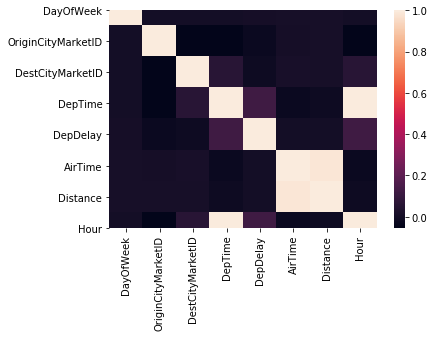

In [56]:
import seaborn as sns

sns.heatmap(df3.corr())

#### Exercise

What is the plane that has the highest average delay? We'll first group by tail number (the *license plate* of a plane) and then calculate the relevant statistic for each group (group of *departures*)

In [67]:
df3.groupby('Tail_Number').mean().sort_values(by='DepDelay', ascending=False)
#ha calculado la media de todas las columnas que no queremos

,DayOfWeek,OriginCityMarketID,DestCityMarketID,DepTime,DepDelay,AirTime,Distance,Hour
Tail_Number,,,,,,,,
N26970,4.000000,31703.0,32457.0,1939.000000,279.000,311.000000,2565.0,19.000000
N820AL,3.500000,30861.0,30861.0,1446.300000,211.300,181.600000,1484.4,14.100000
N724AN,6.000000,31384.5,31722.0,1584.500000,202.000,167.500000,1571.5,15.500000
N284JB,3.666667,31514.0,31325.0,1771.333333,148.000,118.666667,828.0,17.333333
N271AY,2.000000,34459.5,34459.5,1272.000000,137.000,198.000000,1576.0,12.500000
...,...,...,...,...,...,...,...,...
N38950,3.000000,30852.0,30325.0,1727.000000,-8.000,191.000000,1452.0,17.000000
N79279,4.750000,33485.5,33485.5,1033.375000,-11.625,24.750000,129.0,10.125000
N36280,3.500000,33485.5,33485.5,887.400000,-14.600,25.100000,129.0,8.600000


In [71]:
#ahora calculamos la media sólamente del valor DepDelay
df3.groupby('Tail_Number')['DepDelay'].mean().sort_values(ascending=False)

Tail_Number
N26970    279.000
N820AL    211.300
N724AN    202.000
N284JB    148.000
N271AY    137.000
           ...   
N647UA     -8.000
N79279    -11.625
N36280    -14.600
N251PS        NaN
N734SA        NaN
Name: DepDelay, Length: 5416, dtype: float64

In [72]:
#esto sería la media por avión y por fecha
df3.groupby(['Tail_Number', 'FlightDate'])['DepDelay'].mean()

Tail_Number  FlightDate
215NV        2019-10-03    -1.666667
             2019-10-04    -7.333333
             2019-10-05    28.500000
             2019-10-06     0.333333
             2019-10-07    -3.000000
                             ...    
N999JQ       2019-10-25    -5.000000
             2019-10-26   -10.000000
             2019-10-27    -7.000000
             2019-10-28    -5.500000
             2019-10-29     4.500000
Name: DepDelay, Length: 143882, dtype: float64

Oh, but those numbers smell like these planes had only a few, very delayed, departures! how can we count the number of departures *and* calculate the average delay at the same time?

In [75]:
df3.groupby('Tail_Number')['DepDelay'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)

,mean,count
Tail_Number,,
N26970,279.000,1
N820AL,211.300,10
N724AN,202.000,2
N284JB,148.000,3
N271AY,137.000,2
...,...,...
N38950,-8.000,1
N79279,-11.625,8
N36280,-14.600,20


Awesome! now, let's look at the average delay of the planes with some departures (let's say, at least 15)

In [78]:
delays = df3.groupby('Tail_Number')['DepDelay'].agg(['mean', 'count'])
consistently_late = delays[delays['count'] >= 15].sort_values(by='mean', ascending=False)
consistently_late

,mean,count
Tail_Number,,
N350AN,102.941176,17
N15986,70.444444,27
N12003,66.391304,23
242NV,64.426829,82
N116DU,61.974359,117
...,...,...
N631VA,-5.904762,21
N611AS,-6.261307,199
N240JQ,-6.666667,18


#### Exercise: 

Show cities by descending number of airports

In [97]:
#nunique funcion de pandas que calcula número de valores únicos
#unique funcion de pandas que muestra los valores únicos
df3.groupby('OriginCityName')['Origin']\
    .agg(['nunique','unique'])\
    .sort_values(by='nunique', ascending=False).head(10)

#no sale ninguna ciudad con mas de 2 aeropuertos porque OriginCityName es el término municipal
#que no coincide con el market al que da servicio

,nunique,unique
OriginCityName,,
"Houston, TX",2,"[IAH, HOU]"
"New York, NY",2,"[LGA, JFK]"
"Chicago, IL",2,"[ORD, MDW]"
"Williston, ND",2,"[ISN, XWA]"
"Phoenix, AZ",2,"[PHX, AZA]"
"Columbus, OH",2,"[CMH, LCK]"
"Mobile, AL",2,"[MOB, BFM]"
"Washington, DC",2,"[DCA, IAD]"
"North Bend/Coos Bay, OR",1,[OTH]


In [98]:
df3.groupby('OriginCityMarketID')['Origin']\
    .agg(['nunique','unique'])\
    .sort_values(by='nunique', ascending=False).head(10)

,nunique,unique
OriginCityMarketID,,
31703,6,"[EWR, LGA, JFK, SWF, HPN, ISP]"
32575,5,"[LAX, LGB, BUR, ONT, SNA]"
30852,3,"[DCA, BWI, IAD]"
30721,3,"[PVD, BOS, MHT]"
32457,3,"[SFO, OAK, SJC]"
32467,2,"[MIA, FLL]"
30466,2,"[PHX, AZA]"
33667,2,"[ORF, PHF]"
30194,2,"[DFW, DAL]"


In [99]:
df3.groupby('OriginCityMarketID')[['Origin', 'OriginCityName']]\
    .agg(['nunique','unique'])\
    .sort_values(by=('Origin','nunique'), ascending=False).head(10)

Origin                                 OriginCityName  \
                   nunique                          unique        nunique   
OriginCityMarketID                                                          
31703                    6  [EWR, LGA, JFK, SWF, HPN, ISP]              5   
32575                    5       [LAX, LGB, BUR, ONT, SNA]              5   
30852                    3                 [DCA, BWI, IAD]              2   
30721                    3                 [PVD, BOS, MHT]              3   
32457                    3                 [SFO, OAK, SJC]              3   
32467                    2                      [MIA, FLL]              2   
30466                    2                      [PHX, AZA]              1   
33667                    2                      [ORF, PHF]              2   
30194                    2                      [DFW, DAL]              2   
30977                    2                      [ORD, MDW]              1   

                                                                       
                                                               unique  
OriginCityMarketID                                                     
31703               [Newark, NJ, New York, NY, Newburgh/Poughkeeps...  
32575               [Los Angeles, CA, Long Beach, CA, Burbank, CA,...  
30852                                 [Washington, DC, Baltimore, MD]  
30721                    [Providence, RI, Boston, MA, Manchester, NH]  
32457                  [San Francisco, CA, Oakland, CA, San Jose, CA]  
32467                                [Miami, FL, Fort Lauderdale, FL]  
30466                                                   [Phoenix, AZ]  
33667                    [Norfolk, VA, Newport News/Williamsburg, VA]  
30194                             [Dallas/Fort Worth, TX, Dallas, TX]  
30977                                                   [Chicago, IL]

#### Exercise

The list above doesn't correspond to our intuitive expectation, probably. That is because airports serving the same general area may be located within several different city limits. This is encapsulated by the "market" concept in commercial aviation.

Find the 10 markets with the most airports, and which airports are included in them.

## Plotting

There are several ways in which we could go about plotting this dataset in order to get acquainted with it. 

For example, do the delays have a relationship with the number of departures a plane does?

#### Exercise

Do a scatter plot of delays_by_plane with matplotlib, plotting mean delay versus number of departures. Check the documentation

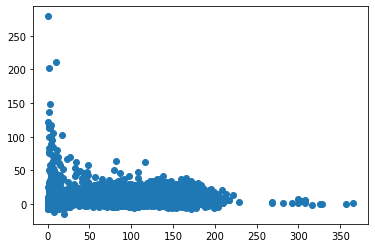

In [103]:
plt.scatter(delays['count'], delays['mean'])

Pretty impossible to see anything in there. Maybe a different kind of plottting is required:

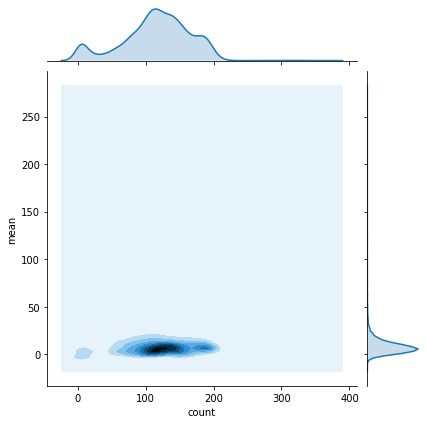

In [104]:
sns.jointplot(delays['count'], delays['mean'], kind='kde')

#### Exercise:

Plot the distribution of delays as a histogram, both with a linear and a logarithmic scale

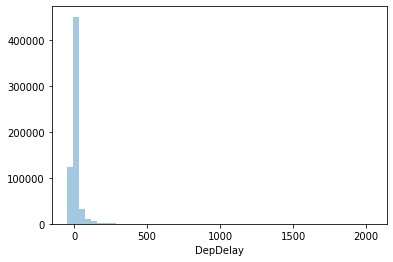

In [110]:
#dropna porque los nan no se pueden representar y da error
sns.distplot(df3['DepDelay'].dropna(), kde=False)

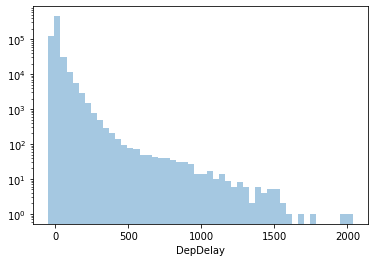

In [111]:
sns.distplot(df3['DepDelay'].dropna(), kde=False)
plt.yscale('log')
#indico que aplique escala logarítmica al eje y para que se vea mejor

#### Exercise:

How do the delays stack over the course of the day? We are going to look at it by plotting the distribution of delays for each hour of the day. The very best way to compare distributions side by side is a boxplot, so we'll use that.

We need to provide `plt.boxplot()` with a sequence that contains 24 elements. Each of those will be a sequence containing every individual delay for one hour of the day. We'll need, therefore, to extract hours of the day for each departure and group based on that.

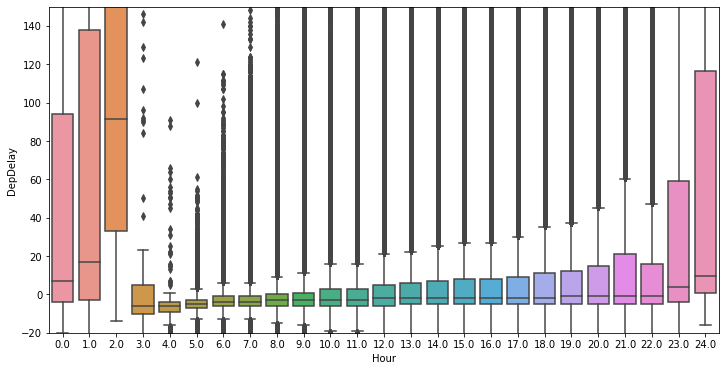

In [114]:
#discretizamos por hora
ax = sns.boxplot(data=df3, x='Hour', y='DepDelay')
ax.set_ylim(-20, 150)
plt.gcf().set_size_inches(12, 6)

#### Exercise

We are also interested in examining how the home base influences delays. Do a boxplot of the delay distribution for the 10 airports with the most flights, and the 10 airports with the least flights.

#### Take home project

If we wanted to do some machine learning, we would need to create as many informative features as we thought could be useful. This is called Feature Engineering.

Discrete data would most often be transformed by [one-hot encoding](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f), which is [very easy to do in pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html).

![One Hot Encoding](https://hackernoon.com/photos/4HK5qyMbWfetPhAavzyTZrEb90N2-3o23tie)

With high cardinality discrete data such as airports or, especially, tail numbers, we would be left with many variables, most of which would not be very informative. There are [several options](https://www.datacamp.com/community/tutorials/encoding-methodologies) to deal with this. The most sophisticated is probably vector encoding, but we can do with a very simple approach: [target encoding](https://maxhalford.github.io/blog/target-encoding-done-the-right-way/).

This means that we substitute each value of the discrete variable by the average or median value of the target variable for that value of the independent discrete variable. However! if we want to use this in machine learning for predictions, we would need to use only the previous values.

Target encode the variable 'Origin' and the 'Tail_Number' variable, using for each cell only the values that were available the previous day. In other words: create a `median_delay_origin` variable that contains, for each record, the median delay at that airport _up to the previous day_. Create another one, `median_delay_plane`, with Tail_Number.